In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 18})

# Import Mixer Data

In [2]:
#7.1
mixed_minus = np.load("data/mixer_data/mixed_minus.npy")
mixed_plus = np.load("data/mixer_data/mixed_plus.npy")

#7.3
mixed_dual_minus = np.load("data/mixer_data/mixed_dual_minus.npy")
mixed_dual_plus = np.load("data/mixer_data/mixed_dual_plus.npy")
mixed_dual_minus_delay = np.load("data/mixer_data/mixed_dual_minus_delay.npy")
mixed_dual_plus_delay = np.load("data/mixer_data/mixed_dual_plus_delay.npy")


In [49]:
ν_s = 62.5e6

Δt = 1 / ν_s

## 7.1 - The Double-SideBand (DSB) Mixer

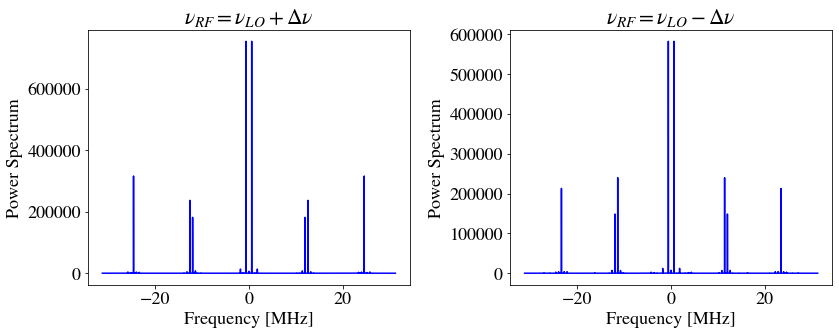

In [4]:
pk_mixed_plus = np.abs(np.fft.fft(mixed_plus[0,0,:]/ 2**16))**2 
pk_mixed_minus = np.abs(np.fft.fft(mixed_minus[0,0,:]/ 2**16))**2 

freq_mixed_plus = np.fft.fftfreq(len(mixed_plus[0,0,:]), Δt)
freq_mixed_minus = np.fft.fftfreq(len(mixed_minus[0,0,:]), Δt)

fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].set_title("$\\nu_{RF} = \\nu_{LO} + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_plus) / 1e6, np.fft.fftshift(pk_mixed_plus), color="blue")

axes[1].set_title("$\\nu_{RF} = \\nu_{LO} - \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_minus) / 1e6, np.fft.fftshift(pk_mixed_minus), color="blue")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Power Spectrum")
    
fig.tight_layout()
plt.show()

In [5]:
FFT_mixed_plus = np.fft.fftshift(np.fft.fft(mixed_plus[0,0,:]/ 2**16))
FFT_mixed_plus[10000:] = 0
FFT_mixed_plus[:6000] = 0

# FFT_mixed_plus[7000:9000] = 0
# # FFT_mixed_plus[:6000] = 0

filtered_mixed_plus = np.fft.ifft(FFT_mixed_plus)
FFT_mixed_plus = np.fft.ifftshift(FFT_mixed_plus)
FFT_mixed_minus = np.fft.fft(mixed_plus[0,0,:]/ 2**16)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


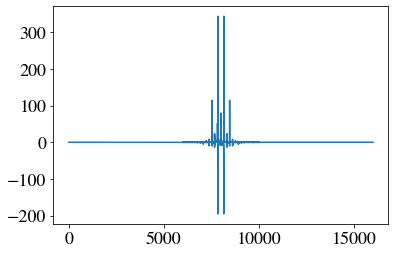

In [6]:
plt.plot(np.fft.fftshift(FFT_mixed_plus))

In [7]:
x = 

SyntaxError: invalid syntax (<ipython-input-7-0f44b287cd63>, line 1)

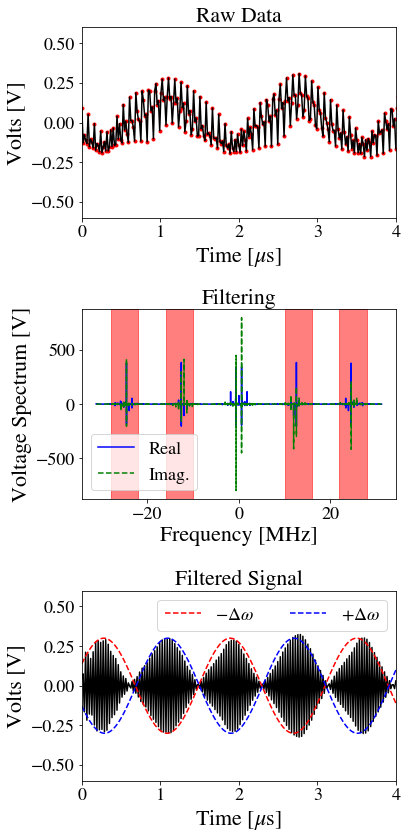

In [8]:
f, axes = plt.subplots(3,1, figsize=(6,12))

# AXES[0] ---------------------------------

axes[0].plot(np.arange(len(mixed_plus[0,0,:])) * Δt * 1e6,
         mixed_plus[0,0,:]/2**16, color="black")
axes[0].scatter(np.arange(len(mixed_plus[0,0,:])) * Δt * 1e6,
         mixed_plus[0,0,:]/2**16, color="red", marker=".")
axes[0].set_xlim(0,4)
axes[0].set_ylim(-1,1)
axes[0].set_title("Raw Data")
axes[0].set_xlabel("Time [$\\mu$s]", fontsize=22)
axes[0].set_ylabel("Volts [V]", fontsize=22)

# AXES[1] ---------------------------------

axes[1].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
             np.fft.fftshift(np.fft.fft(mixed_plus[0,0,:]/ 2**16)).real,
             color="blue", label="Real")
axes[1].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
             np.fft.fftshift(np.fft.fft(mixed_plus[0,0,:]/ 2**16)).imag,
             linestyle="--", color="green", label="Imag.")

axes[1].axvspan(-28, -22, alpha=0.5, color='red')
axes[1].axvspan(22, 28, alpha=0.5, color='red')

axes[1].axvspan(-16, -10, alpha=0.5, color='red')
axes[1].axvspan(10, 16, alpha=0.5, color='red')

axes[1].legend()
axes[1].set_title("Filtering")
axes[1].set_xlabel("Frequency [MHz]", fontsize=22)
axes[1].set_ylabel("Voltage Spectrum [V]", fontsize=22)

# AXES[2] ---------------------------------

# axes[2].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
#              np.fft.fftshift(FFT_mixed_plus).real,
#              color="blue", label="Real")
# axes[2].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
#              np.fft.fftshift(FFT_mixed_plus).imag,
#              linestyle="--", color="green", label="Imaginary")

x=np.linspace(0,4,1000)
y_1 = 0.3*np.cos(3.9*(x - 0.605*2*np.pi + 0.3))
y_2 = 0.3*np.cos(3.9*(x + 0.595*2*np.pi))

axes[2].plot(np.arange(len(filtered_mixed_plus)) * Δt * 1e6,
         filtered_mixed_plus*2, color="black")
axes[2].plot(x,y_1, linestyle="--",color="red", label="$- \Delta \omega$")
axes[2].plot(x,y_2, linestyle="--", color="blue", label="$+ \Delta \omega$")
# axes[2].scatter(np.arange(len(filtered_mixed_plus)) * Δt * 1e6,
#          filtered_mixed_plus*2, color="red", marker=".")
axes[2].legend(ncol=2)
axes[2].set_xlim(0,4)
axes[2].set_ylim(-0.6,0.6)
axes[0].set_ylim(-0.6,0.6)
axes[2].set_title("Filtered Signal")
axes[2].set_xlabel("Time [$\\mu$s]", fontsize=22)
axes[2].set_ylabel("Volts [V]", fontsize=22)

f.tight_layout()
f.savefig("Fourier_Filtering.pdf", dpi=300)
plt.show()

note: good idea is to put arrows where the sum and difference frequencies would be.

## 7.2 - Intermodulation Products in Real Mixers

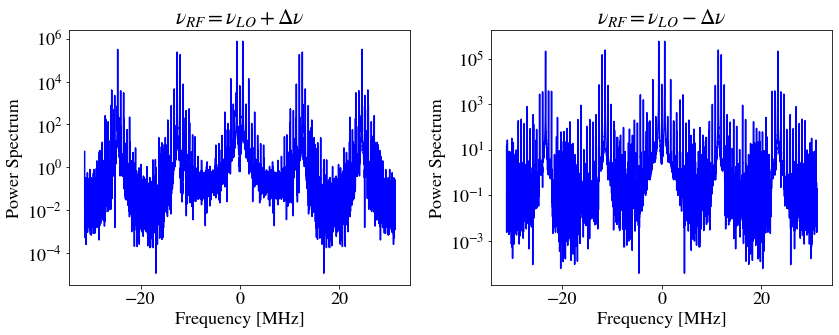

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].set_title("$\\nu_{RF} = \\nu_{LO} + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_plus) / 1e6, np.fft.fftshift(pk_mixed_plus), color="blue")

axes[1].set_title("$\\nu_{RF} = \\nu_{LO} - \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_minus) / 1e6, np.fft.fftshift(pk_mixed_minus), color="blue")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Power Spectrum")
    ax.semilogy()
    
fig.tight_layout()
plt.show()

## 7.3 - The Single-Sideband Mixer (SSB Mixer)

In [66]:
# mixed_dual_minus = np.load("data/mixer_data/mixed_dual_minus.npy")
# mixed_dual_plus = np.load("data/mixer_data/mixed_dual_plus.npy")
# mixed_dual_minus_delay = np.load("data/mixer_data/mixed_dual_minus_delay.npy")
# mixed_dual_plus_delay = np.load("data/mixer_data/mixed_dual_plus_delay.npy")

mixed_dual_minus = np.load("data/7.3_data/no_shift_minus.npy")
mixed_dual_plus = np.load("data/7.3_data/no_shift_plus.npy")
mixed_dual_minus_delay = np.load("data/7.3_data/phase_shift_minus.npy")
mixed_dual_plus_delay = np.load("data/7.3_data/phase_shift_plus.npy")


In [67]:
mixed_dual_minus.shape

(1, 1, 16000)

In [68]:
#DSB
mixed_dual_plus_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_plus_complex[:].real = mixed_dual_plus[0,0,:] / 2**16
# mixed_dual_plus_complex[:].imag = mixed_dual_plus[1,0,:]/ 2**16

mixed_dual_minus_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_minus_complex[:].real = mixed_dual_minus[0,0,:] / 2**16
# mixed_dual_minus_complex[:].imag = mixed_dual_minus[1,0,:] / 2**16

#SSB
mixed_dual_plus_delay_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_plus_delay_complex[:].real = mixed_dual_plus_delay[0,0,:] / 2**16
mixed_dual_plus_delay_complex[:].imag = mixed_dual_plus_delay[1,0,:] / 2**16

mixed_dual_minus_delay_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_minus_delay_complex[:].real = mixed_dual_minus_delay[0,0,:] / 2**16
mixed_dual_minus_delay_complex[:].imag = mixed_dual_minus_delay[1,0,:] / 2**16

In [69]:
mixed_dual_minus_delay_complex

array([-0.03515625-0.0546875j , -0.046875  -0.03515625j,
       -0.05859375-0.046875j  , ..., -0.015625  -0.015625j  ,
       -0.015625  -0.01953125j, -0.00390625-0.01171875j])

In [70]:

pk_mixed_dual_plus = np.abs(np.fft.fft(mixed_dual_plus_complex))**2
pk_mixed_dual_minus = np.abs(np.fft.fft(mixed_dual_minus_complex))**2
freq_mixed_dual_plus = np.fft.fftfreq(len(mixed_dual_plus[0,0,:]), Δt)
freq_mixed_dual_minus = np.fft.fftfreq(len(mixed_dual_minus[0,0,:]), Δt)

pk_mixed_dual_plus_delay = np.abs(np.fft.fft(mixed_dual_plus_delay_complex))**2
pk_mixed_dual_minus_delay = np.abs(np.fft.fft(mixed_dual_minus_delay_complex))**2
freq_mixed_dual_plus_delay = np.fft.fftfreq(len(mixed_dual_plus_delay[0,0,:]), Δt)
freq_mixed_dual_minus_delay = np.fft.fftfreq(len(mixed_dual_minus_delay[0,0,:]), Δt)

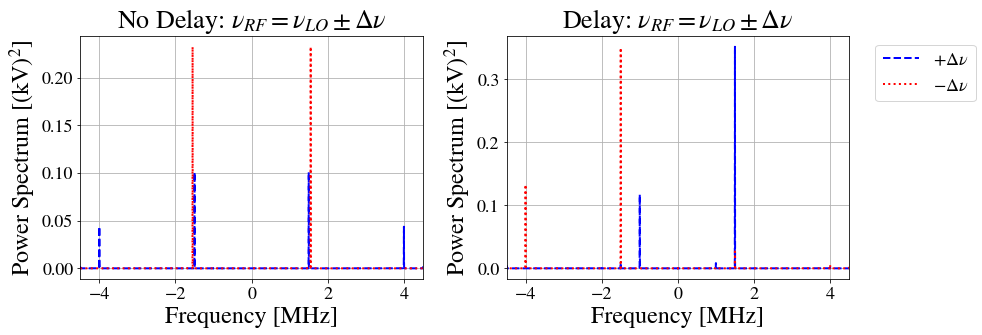

In [130]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

axes[0].set_title("No Delay: $\\nu_{RF} = \\nu_{LO} \pm \\Delta \\nu$",fontsize=26)
axes[0].plot(np.fft.fftshift(freq_mixed_dual_plus) / 1e6, 
             np.fft.fftshift(pk_mixed_dual_plus) /1e6, color="blue",linewidth=2,linestyle="--",label="$ + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_dual_minus) / 1e6, 
             np.fft.fftshift(pk_mixed_dual_minus)/1e6, color="red", linewidth=2,linestyle=":",label="$ - \\Delta \\nu$")


axes[1].set_title("Delay: $\\nu_{RF} = \\nu_{LO} \pm \\Delta \\nu$",fontsize=26)
axes[1].plot(np.fft.fftshift(freq_mixed_dual_plus_delay) / 1e6, 
             np.fft.fftshift(pk_mixed_dual_plus_delay)/1e6, color="blue",linewidth=2, linestyle="--",label="$ + \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_dual_minus_delay) / 1e6, 
             np.fft.fftshift(pk_mixed_dual_minus_delay)/1e6, color="red", linewidth=2, linestyle=":",label="$ - \\Delta \\nu$")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]",fontsize=24)
    ax.set_ylabel("Power Spectrum [$\mathrm{(kV)}^2$]",fontsize=24)
#     ax.semilogy()
    ax.set_xlim(-4.5,4.5)
    ax.grid()
    
axes[1].legend(bbox_to_anchor=(1.05,1.0), loc="upper left")
# axes[1].arrow(0,0.15, dx=-0.5, dy=-0.02, color="black", width=0.005, head_width=0.02,head_length=0.3)
    
fig.tight_layout()
fig.savefig("SSB_mixer.pdf", dpi=300)
plt.show()

Note, the secondary smaller peaks in the bottom figure are aliasing. The tallest peaks are the ($\omega_2 - \omega_1$) that we are looking for